#  Diabetes Prediction Project

# Introduction:





**Diabetes is a chronic health condition characterized by high levels of blood glucose, either due to inadequate insulin production, insulin resistance, or both. Early detection and management of diabetes are crucial for preventing complications and improving patient outcomes. Machine learning techniques offer promising avenues for predicting diabetes risk based on patient data, enabling timely intervention and personalized care.**

# Objective:


**The aim of this project is to predict whether a person is likely to be diagnosed with diabetes using machine learning techniques. By analyzing clinical and demographic data, the model helps identify individuals at higher risk of developing diabetes for timely intervention.**

# Dataset Description:


**The dataset contains various attributes such as glucose levels, blood pressure, BMI, age, and family history of diabetes, along with the corresponding diabetes diagnosis (0 for no diabetes, 1 for diabetes).**

# Approach:


**Exploratory Data Analysis (EDA):** Understand data distribution, correlations, and patterns related to diabetes diagnosis.


**Preprocessing and Feature Engineering:** Clean data, handle missing values, and transform features for better model performance.


**Model Selection and Training:** Explore various classification algorithms like logistic regression, decision trees, random forests, SVM, etc., and train models on the dataset.


**Model Evaluation:** Assess model performance using metrics like accuracy, precision, recall, and F1-score.

#Importing of necessary libraries required for EDA and ML


In [30]:
#Importing of necessary libraries required for EDA and ML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Loading of Dataset

In [2]:
data = pd.read_csv("/content/diabetes.csv")

# EDA

In [3]:

# Exploratory Data Analysis (EDA)
print("Shape of the dataset:", data.shape)
print("First 5 rows of the dataset:\n", data.head())
print("Dataset Information:\n", data.info())
print("Statistical description of the dataset:\n", data.describe())

Shape of the dataset: (768, 9)
First 5 rows of the dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies            

# Data distribution and Corr.

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

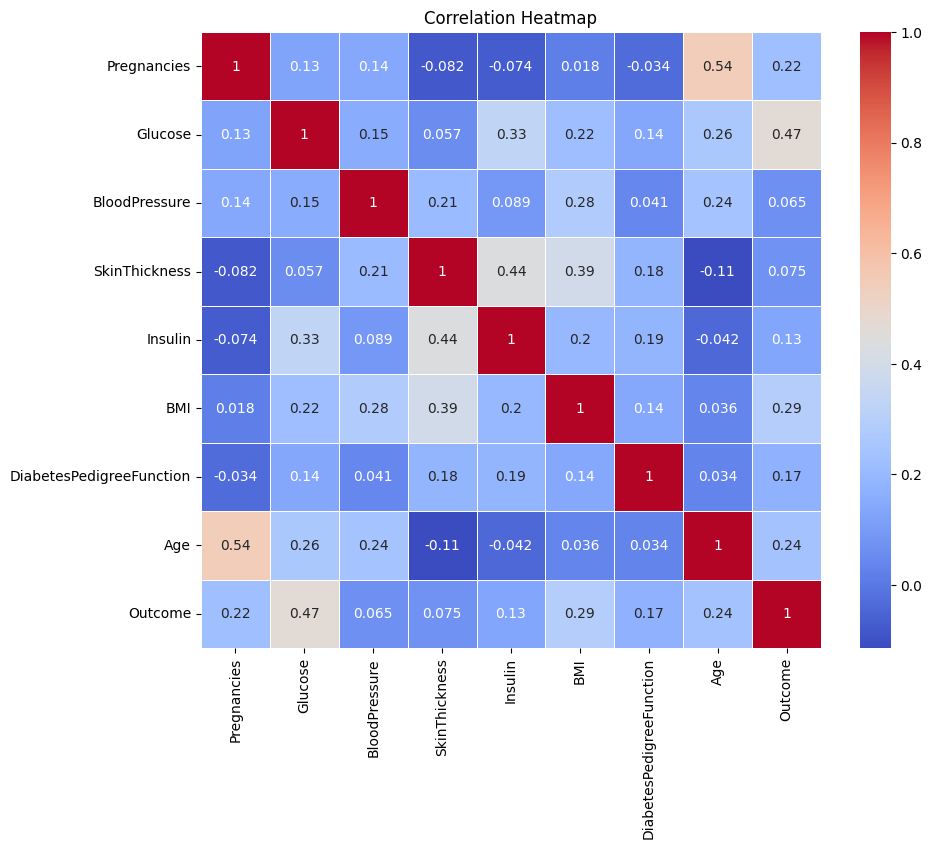

In [27]:
#correlation
print(data.corr())
# Visualizing data distribution and correlation

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Glucose Level : Higher glucose levels are associated with a higher likelihood of having diabetes.

BMI  : Individuals with higher Body Mass Index (BMI) values may be more likely to have diabetes.

Age  : Younger individuals may be less likely to have diabetes compared to older individuals.

Diabetes Pedigree Function : Individuals with a family history of diabetes may be at a higher risk.

These factors provide valuable insights into the potential predictors of diabetes outcome.

#Handling missing values

In [6]:
print(data.isnull().sum())
print(data.fillna(data.mean(), inplace=True))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
None


# Splitting  Data into X and Y

In [8]:
# Splitting the dataset into features (X) and label (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
print(X)
print(y)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


#Splitting dataset into Training and Testing sets

In [14]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Feature Scaling

In [15]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train,X_test)

[[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]] [[ 0.68185612 -0.71402038 -0.61712658 ...  0.26073561 -0.11637247
   0.87809089]
 [-0.52639686 -0.27664283  0.30191569 ...  0.48053518 -0.954231
  -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 ... -0.15300476 -0.9245197
  -1.03594038]
 ...
 [ 1.28598261 -0.80774414  0.13973176 ...  0.62275843  0.04703966
   2.0961108 ]
 [-0.52639686  0.78555979  0.03160914 ... -0.51502758 -0.39268751
  -0.33992901]
 [ 1.28598261 -1.46381046  0.03160914 ...  0.42881763  0.70068816
   0.53008521]]


#Model 1: Logistic Regression

In [16]:
# Model 1: Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)


# Model 2: Decision Tree

In [17]:
# Model 2: Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Model 3: Random Forest

In [18]:
# Model 3: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)



# Model 4: Support Vector Machine (SVM)

In [19]:

# Model 4: Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

#Comparision of Model Accuracies

Logistic Regression Accuracy: 75.32%
Decision Tree Accuracy: 77.27%
Random Forest Accuracy: 72.08%
Support Vector Machine (SVM) Accuracy: 73.38%


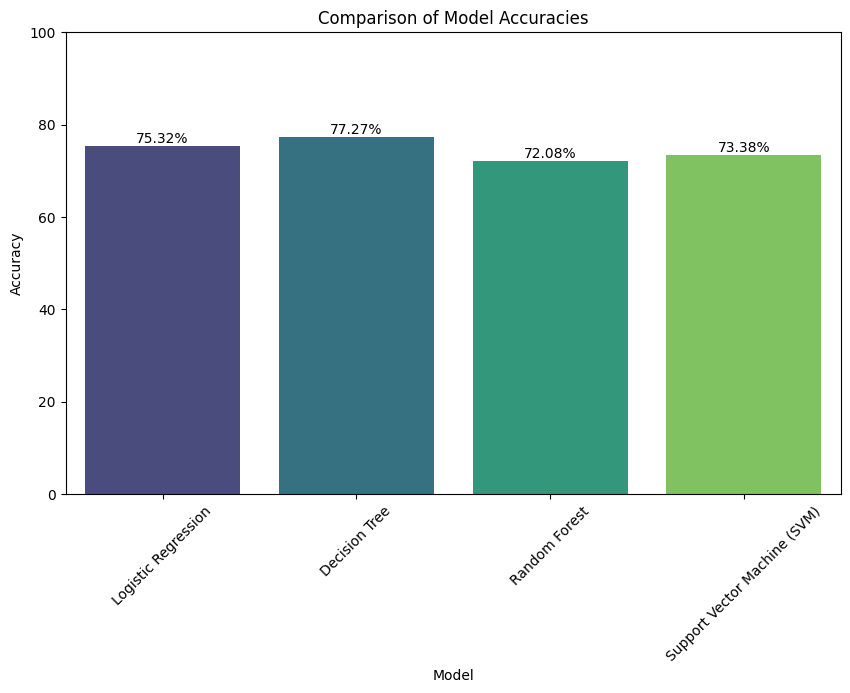

In [32]:
# Comparing accuracies
model_accuracies = {
    'Logistic Regression': logistic_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'Support Vector Machine (SVM)': svm_accuracy
}

# Printing accuracies
for model, accuracy in model_accuracies.items():
    print(f"{model} Accuracy: {accuracy * 100:.2f}%")


# Plotting accuracies of all models with percentages displayed on bars
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(model_accuracies.keys()), y=[accuracy * 100 for accuracy in model_accuracies.values()],
                 palette='viridis')  # Using 'viridis' colormap for gradient colors

# Add percentages on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limit to ensure percentages display correctly
plt.show()


**From above models we are concluding that *Decistion Tree Model* is Performing  well from all other models with high *Accuracy* of 77.27%**  

#Conclusion:


**This project demonstrates the use of machine learning in healthcare for early diabetes detection and risk assessment. By leveraging patient data and advanced modeling techniques, healthcare professionals can make informed decisions, prioritize interventions, and personalize treatment plans, leading to improved patient outcomes.**